# Exploring College Scorecard Data

Susan Brake<br>
December 10, 2015

### Data source: College Scorecard Data available at https://collegescorecard.ed.gov/data/

## Part 1: Get the Data

In [1]:
# Import needed libraries.
import pandas as pd
import pandas.io.data as web
import datetime
import vincent
from pandas.stats.api import ols
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# Confirm in correct directory
# Should be '/Users/susan/Documents/School/Data Programming'
%pwd

u'/Users/susan/Documents/School/Data Programming'

In [4]:
# create dataframe
# mydata = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2013_PP.csv', dtype = 'object')
mydata = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2013_PP.csv', encoding="utf-8-sig")

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
# Let's take a look
mydata.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.443586698337,0.45251396648,0.484818805093,0.406,0.423580786026,0.442452830189,NaN,0.30871831265508,NaN,0.35168556430446
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.732297852901,0.795454545455,0.760521885522,0.755344418052,0.751552795031,0.765074770863,NaN,0.50854980789381,NaN,0.4730923834537
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.600877192982,0.775,0.610465116279,0.686567164179,0.632653061224,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.738341968912,0.85140562249,0.768378650554,0.798440979955,0.778156996587,0.791666666667,NaN,0.47821134615384,NaN,0.49412939796716
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.320016820858,0.380829015544,0.364423717522,0.286530612245,0.315737051793,0.334633385335,NaN,0.25748195545488,NaN,0.29365162671232


In [6]:
# Check data types
mydata.dtypes

UNITID                           int64
OPEID                            int64
opeid6                           int64
INSTNM                          object
CITY                            object
STABBR                          object
ZIP                             object
AccredAgency                    object
INSTURL                         object
NPCURL                          object
sch_deg                        float64
HCM2                             int64
main                             int64
NUMBRANCH                        int64
PREDDEG                          int64
HIGHDEG                          int64
CONTROL                          int64
st_fips                          int64
region                           int64
LOCALE                         float64
locale2                        float64
LATITUDE                       float64
LONGITUDE                      float64
CCBASIC                        float64
CCUGPROF                       float64
CCSIZSET                 

In [7]:
# How many rows
len(mydata)

7804

In [8]:
# How many variables?
len(mydata.columns)

1729

In [9]:
# 1729 variables -- that's way too many.
# Save the column names to a dataframe
all_cols = pd.DataFrame(mydata.columns.values)

In [11]:
# all_cols

In [13]:
# Export the column names as csv.
all_cols.to_csv('all_cols.csv')

In [14]:
# Review the data documentation and select the needed variables.
# Import the reduced list of column names.
selected_cols = pd.read_csv('selected_cols.csv')

In [16]:
# 163 variables selected. Still a lot, but manageable.
selected_cols

,column_name
0,UNITID
1,INSTNM
2,CITY
3,STABBR
4,main
5,NUMBRANCH
6,PREDDEG
7,HIGHDEG
8,CONTROL
9,region


In [17]:
# Convert the dataframe of selected columns to a list
selected_cols = selected_cols['column_name'].values.tolist()

In [19]:
# Subset dataset to just the needed columns.
mydata = mydata[selected_cols]

In [22]:
# Take another look at the data.
mydata.head(5)

,UNITID,INSTNM,CITY,STABBR,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,...,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,gt_25k_p8,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,Alabama A & M University,Normal,AL,1,1,3,4,1,5,...,NaN,NaN,NaN,NaN,NaN,33611.5,373.156553575,0.444713870029,NaN,0.30871831265508
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,1,3,4,1,5,...,NaN,NaN,NaN,NaN,NaN,23117,256.64608985,0.756266666667,NaN,0.50854980789381
2,100690,Amridge University,Montgomery,AL,1,1,3,4,2,5,...,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,0.647249190939,NaN,PrivacySuppressed
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,1,3,4,1,5,...,NaN,NaN,NaN,NaN,NaN,24738,274.6425129,0.781997918835,NaN,0.47821134615384
4,100724,Alabama State University,Montgomery,AL,1,1,3,4,1,5,...,NaN,NaN,NaN,NaN,NaN,33452,371.3857766,0.331198861615,NaN,0.25748195545488


In [23]:
# mydata includes information for all colleges, regardless of whether they are currently operating
len(mydata)

7804

In [24]:
# We are only interested in colleges that are currently operating.
mydata = mydata[mydata['CURROPER'] == 1]

In [ ]:
#How many after applying that filter?
len(mydata)

# Part 2: Help Jeff Find a College

Now that we have all this information, what can we do with it?

Let's help someone find the right college(s). 

### Meet Jeff.

<img src="college_guy.jpg"   style="width: 600px;"/>

<ul>
<li>He's 18 and a senior in high school.</li>
<li>He wants to go to school with other traditionally colleged-aged students.</li>
<li>His SAT score is 1100; 500 verbal, 600 math</li>
<li>He's not sure what he wants to major in, but he thinks there will be opportunities in biology, maybe nursing.</li>
<li>He wants a Bachelor's degree.</li>
<li>He wants a traditional college experience.</li>
<li>He wants a school near a city center.</li>
<li>He's going to need to take out loans to finance his education.</li>
</ul>

## 2.1 Focus in on the colleges Jeff would like the best.

In [30]:
# What are the descriptive stats for 'UG25abv'?
mydata['UG25abv'].describe()

count    6718.000000
mean        0.414582
std         0.228944
min         0.000500
25%         0.245300
50%         0.404800
75%         0.577350
max         1.000000
Name: UG25abv, dtype: float64

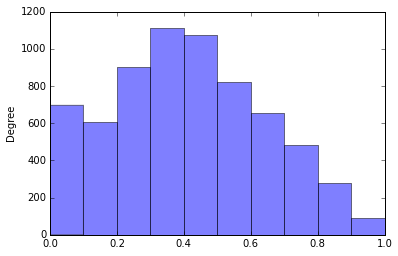

In [34]:
# Let's visualize it.
mydata['UG25abv'].plot(kind='hist', alpha=0.5)

In [35]:
# Jeff would like a college where "old folks" (age 25 or older) are less than 20%
jeffdata = mydata[mydata['UG25abv'] < 0.20]

In [36]:
# That limits the number to 1295. 
len(jeffdata)

1295

In [37]:
# Jeff also wants a college that is near a city center.
# The variable 'LOCALE' contains this information. What are the levels of this variable?
sorted(list(pd.unique(jeffdata.LOCALE)))

[11.0, 12.0, 13.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 41.0, 42.0, 43.0, nan]

#### What does LOCALE mean?
<table>
<tr><th>LOCALE Code</th><th>LOCALE Meaning</th></tr>
<tr><td>11</td><td>City: Large (population of 250,000 or more)</td></tr>
<tr><td>12</td><td>City: Midsize (population of at least 100,000 but less than 250,000)</td></tr>
<tr><td>13</td><td>City: Small (population less than 100,000)</td></tr>
<tr><td>21</td><td>Suburb: Large (outside principal city, in urbanized area with population of 250,000 or more)</td></tr>
<tr><td>22</td><td>Suburb: Midsize (outside principal city, in urbanized area with population of at least 100,000 but less than 250,000)</td></tr>
<tr><td>23</td><td>Suburb: Small (outside principal city, in urbanized area with population less than 100,000)</td></tr>
<tr><td>31</td><td>Town: Fringe (in urban cluster up to 10 miles from an urbanized area)</td></tr>
<tr><td>32</td><td>Town: Distant (in urban cluster more than 10 miles and up to 35 miles from an urbanized area)</td></tr>
<tr><td>33</td><td>Town: Remote (in urban cluster more than 35 miles from an urbanized area)</td></tr>
<tr><td>41</td><td>Rural: Fringe (rural territory up to 5 miles from an urbanized area or up to 2.5 miles from an urban cluster)</td></tr>
<tr><td>42</td><td>Rural: Distant (rural territory more than 5 miles but up to 25 miles from an urbanized area or more than 2.5 and up to 10 miles from an urban cluster)</td></tr>
<tr><td>43</td><td>Rural: Remote (rural territory more than 25 miles from an urbanized area and more than 10 miles from an urban cluster)</td></tr>
</table>

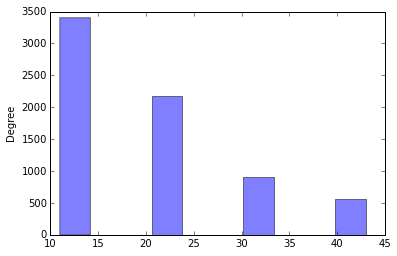

In [38]:
# Let's visualize it.
mydata['LOCALE'].plot(kind='hist', alpha=0.5)

In [39]:
# Jeff wants locale to be 11, 12, 13, 21 or 22.
jeffdata = jeffdata[jeffdata['LOCALE'] <= 22]

In [40]:
# Down to 852
len(jeffdata)

852

In [41]:
# He doesn't want to go to a branch. He wants to be on the main campus.
jeffdata = jeffdata[jeffdata['main'] == 1]

In [42]:
# Down to 799
len(jeffdata)

799

In [43]:
# He wants a school that offers a program of study in biology. 
# The variable PCIP26 contains that information. Let's get descriptive statistics.
jeffdata['PCIP26'].describe()

count    798.000000
mean       0.053945
std        0.052625
min        0.000000
25%        0.000000
50%        0.047200
75%        0.086275
max        0.331900
Name: PCIP26, dtype: float64

In [44]:
# He also wants a school that offers a program of study in nursing. 
# The variable PCIP51 contains that information. Let's get descriptive statistics.
jeffdata['PCIP51'].describe()

count    798.000000
mean       0.075242
std        0.151902
min        0.000000
25%        0.000000
50%        0.015300
75%        0.097125
max        1.000000
Name: PCIP51, dtype: float64

In [45]:
# He doesn't want a college that's too concentrated in biology or nursing.
jeffdata = jeffdata[(jeffdata['PCIP26'] > 0.01) & (jeffdata['PCIP26'] < 0.15)
                   & (jeffdata['PCIP51'] > 0.01) & (jeffdata['PCIP51'] < 0.15)]

In [46]:
# Down to 275
len(jeffdata)

275

In [48]:
# He wants to study with mostly full-time undergraduates.
jeffdata['PPTUG_EF'].describe()

count    275.000000
mean       0.070758
std        0.050179
min        0.000000
25%        0.033800
50%        0.059400
75%        0.100300
max        0.259600
Name: PPTUG_EF, dtype: float64

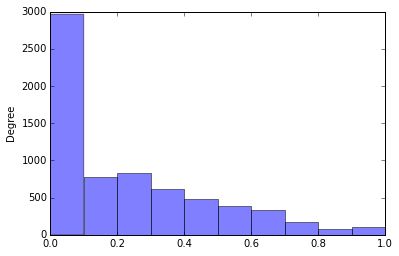

In [51]:
# Let's visualize it.
mydata['PPTUG_EF'].plot(kind='hist', alpha=0.5)


In [52]:
jeffdata = jeffdata[(jeffdata['PREDDEG'] == 3) & (jeffdata['PPTUG_EF'] < 0.05)]

In [53]:
# Down to 118
len(jeffdata)

118

In [58]:
# He doesn't want to go to a college that's too big, or too small.
jeffdata['UGDS'].describe()

count      118.000000
mean      7314.169492
std       8009.980821
min        491.000000
25%       2126.500000
50%       3722.000000
75%       9145.750000
max      39460.000000
Name: UGDS, dtype: float64

In [60]:
# Filter between 2,000 and 10,000 students.
jeffdata = jeffdata[(jeffdata['UGDS'] > 2000) & (jeffdata['UGDS'] < 10000)]

In [61]:
# Down to 66
len(jeffdata)

66

In [62]:
# He likes the ladies. He'd like to go where his odds will be decent.
# Oddly...no data available that breaks down undergraduates by gender. 

In [64]:
# So here's where he'd like to be.
jeffdata

,UNITID,INSTNM,CITY,STABBR,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,...,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,gt_25k_p8,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
222,110097,Biola University,La Mirada,CA,1,1,3,4,2,8,...,NaN,NaN,NaN,NaN,NaN,23969,266.10503645,0.929334916865,NaN,0.65301926952141
283,111948,Chapman University,Orange,CA,1,1,3,4,2,8,...,NaN,NaN,NaN,NaN,NaN,20250,224.8165125,0.870821014328,NaN,0.74165697612732
467,120883,University of the Pacific,Stockton,CA,1,1,3,4,2,8,...,NaN,NaN,NaN,NaN,NaN,23500,260.898175,0.885284810127,NaN,0.5735814294441
475,121309,Point Loma Nazarene University,San Diego,CA,1,1,3,4,2,8,...,NaN,NaN,NaN,NaN,NaN,24951,277.00724955,0.938292476754,NaN,0.73574742268041
505,122612,University of San Francisco,San Francisco,CA,1,1,3,4,2,8,...,NaN,NaN,NaN,NaN,NaN,25000,277.55125,0.872443487621,NaN,0.68186945882352
518,122931,Santa Clara University,Santa Clara,CA,1,2,3,4,2,8,...,NaN,NaN,NaN,NaN,NaN,20500,227.592025,0.946601941748,NaN,0.85159626131444
658,129242,Fairfield University,Fairfield,CT,1,1,3,4,2,1,...,NaN,NaN,NaN,NaN,NaN,26778,297.2906949,0.965765765766,NaN,0.81415270425776
717,131496,Georgetown University,Washington,DC,1,1,3,4,2,2,...,NaN,NaN,NaN,NaN,NaN,17500,194.285875,0.965659340659,NaN,0.92886511848341
730,132602,Bethune-Cookman University,Daytona Beach,FL,1,1,3,4,2,5,...,NaN,NaN,NaN,NaN,NaN,35650,395.7880825,0.381695267811,NaN,0.46919024390243
851,137546,Stetson University,DeLand,FL,1,1,3,4,2,5,...,NaN,NaN,NaN,NaN,NaN,27000,299.75535,0.85663507109,NaN,0.64256176470588


## 2.2 Jeff likes them. But will they like Jeff?

In [66]:
# Jeff's SAT score was ok, but not great. What do the average SAT scores look like?
jeffdata['SAT_AVG'].describe()

count      60.000000
mean     1182.466667
std       126.383928
min       812.000000
25%      1111.250000
50%      1163.000000
75%      1235.500000
max      1458.000000
Name: SAT_AVG, dtype: float64

In [67]:
# Filter out colleges with high average SAT scores.
jeffdata = jeffdata[(jeffdata['SAT_AVG'] <= 1100) | pd.isnull(jeffdata['SAT_AVG'])]

In [69]:
# That leaves 19. 
len(jeffdata)

19

In [70]:
# How many of these could he likely get into?
jeffdata['ADM_RATE'].describe()

count    18.000000
mean      0.688483
std       0.132678
min       0.393100
25%       0.638975
50%       0.714800
75%       0.781100
max       0.921200
Name: ADM_RATE, dtype: float64

In [71]:
jeffdata = jeffdata[jeffdata['ADM_RATE'] > 0.50]

In [72]:
# Down to 16.
len(jeffdata)

16

In [73]:
# Here's the list.
jeffdata

,UNITID,INSTNM,CITY,STABBR,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,...,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,gt_25k_p8,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
658,129242,Fairfield University,Fairfield,CT,1,1,3,4,2,1,...,NaN,NaN,NaN,NaN,NaN,26778,297.2906949,0.965765765766,NaN,0.81415270425776
730,132602,Bethune-Cookman University,Daytona Beach,FL,1,1,3,4,2,5,...,NaN,NaN,NaN,NaN,NaN,35650,395.7880825,0.381695267811,NaN,0.46919024390243
859,137847,The University of Tampa,Tampa,FL,1,1,3,4,2,5,...,NaN,NaN,NaN,NaN,NaN,25975,288.37574875,0.867700258398,NaN,0.59304570943075
1048,144962,Elmhurst College,Elmhurst,IL,1,1,3,4,2,3,...,NaN,NaN,NaN,NaN,NaN,23250,258.1226625,0.914155251142,NaN,0.7379068548387
1114,147244,Millikin University,Decatur,IL,1,1,3,4,2,3,...,NaN,NaN,NaN,NaN,NaN,27000,299.75535,0.835541699143,NaN,0.57475
1727,166850,Merrimack College,North Andover,MA,1,1,3,4,2,1,...,NaN,NaN,NaN,NaN,NaN,27000,299.75535,0.938271604938,NaN,0.62141650893796
2498,191931,Iona College,New Rochelle,NY,1,1,3,4,2,2,...,NaN,NaN,NaN,NaN,NaN,25250,280.3267625,0.881569207994,NaN,0.63623266998341
2561,193973,Niagara University,Niagara University,NY,1,1,3,4,2,2,...,NaN,NaN,NaN,NaN,NaN,25650,284.7675825,0.870302137067,NaN,0.66230034674063
2601,195234,The College of Saint Rose,Albany,NY,1,1,3,4,2,2,...,NaN,NaN,NaN,NaN,NaN,25000,277.55125,0.893840104849,NaN,0.65510838033843
2816,199962,Wingate University,Wingate,NC,1,1,3,4,2,5,...,NaN,NaN,NaN,NaN,NaN,25976.5,288.392401825,0.866666666667,NaN,0.492


## 2.3 Can Jeff afford to go? 

In [74]:
# Create new net_cost variable
jeffdata['net_cost'] = jeffdata.fillna(0)['NPT4_PUB'] + jeffdata.fillna(0)['NPT4_PRIV'] + jeffdata.fillna(0)['NPT4_PROG']

In [128]:
# Sort by net_cost, descending
pd.DataFrame(jeffdata.sort(['net_cost'], ascending=False), columns = ['INSTNM', 'net_cost'])

,INSTNM,net_cost
658,Fairfield University,35212
1727,Merrimack College,29063
859,The University of Tampa,27955
2498,Iona College,27754
3460,Wilkes University,24660
4103,Whitworth University,24412
2601,The College of Saint Rose,23854
3969,Lynchburg College,21706
3332,Mercyhurst University,20478
1114,Millikin University,19476


In [116]:
bar = vincent.Bar(jeffdata['net_cost'])
# bar.axis_titles(x='School ID', y='Average Cost per Year')
bar.display()

# Intermission for Vincent Vega.

<img src="vincent_vega2.jpg"   style="height: 400px;"/>

# Part 3: If you pay more, will you get paid more?

We want to know whether going into debt for college is worth it in terms of future earnings.
The most recent college data doesn't have earnings numbers (because not enough time has gone by).

### What if we predict earning potential based on historical data and then compare that to student debt at graduation?

In [85]:
# Import 2005 data
olddata = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2005_PP.csv', encoding="utf-8-sig")

In [86]:
# limit the columns as before
olddata = olddata[selected_cols]

In [87]:
len(olddata)

6824

In [88]:
# Filter for only currently operating colleges
olddata = olddata[olddata['CURROPER'] == 1]

In [90]:
# The variable 'gt_25k_p8' reflects the share of graduates that earn more than $25,000 8 years after graduation.
# This measure is recommended, since we don't have program-level earnings data.
# Let's take a look.
olddata['gt_25k_p8'].describe()

count                  5049
unique                 3311
top       PrivacySuppressed
freq                    793
Name: gt_25k_p8, dtype: object

In [91]:
# Filter out 'PrivacySuppressed' colleges
olddata = olddata[olddata['gt_25k_p8'] != 'PrivacySuppressed']

In [92]:
# Change dtype to float
olddata['gt_25k_p8'] = olddata['gt_25k_p8'].astype(float)

In [93]:
# Take another look.
olddata['gt_25k_p8'].describe()
# That's better.

count    4256.000000
mean        0.621336
std         0.163410
min         0.092593
25%         0.524914
50%         0.638064
75%         0.751031
max         1.000000
Name: gt_25k_p8, dtype: float64

In [94]:
# Selecting variables for the model
# Here are the program of study variables. They all start with 'PCIP'
PCIP_vars = list(olddata.filter(regex=r'^PCIP.', axis=1).columns)

In [95]:
# We want to predict the earning power above non-college graduates in 8 years. 
dep_var = ['gt_25k_p8']
ind_vars = ['main', 'NUMBRANCH', 'ADM_RATE', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'region',
            'SAT_AVG', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PPTUG_EF', 
            'PFTFTUG1_EF', 'UG25abv']

In [96]:
ind_vars = ind_vars + PCIP_vars

In [98]:
# ind_vars

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


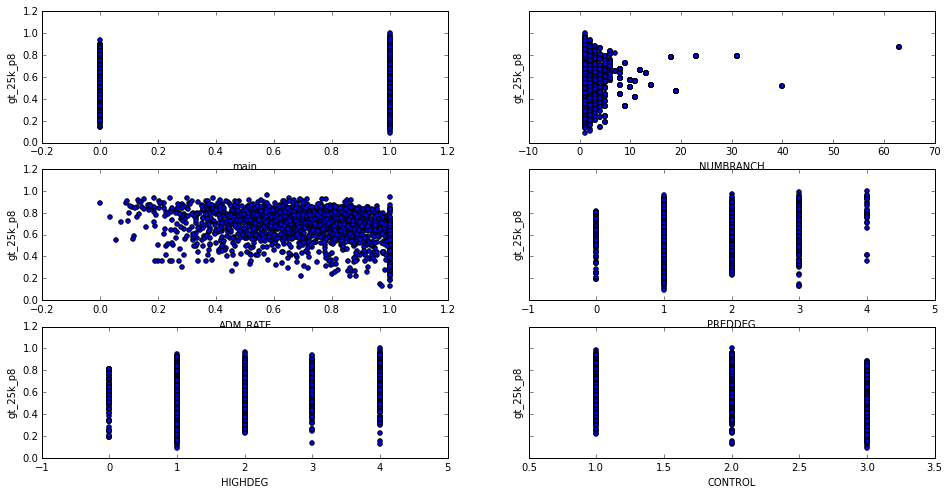

In [99]:
# visualize the relationship between the independent variables and the target variable using scatterplots
fig, axs = plt.subplots(3, 2, sharey=True)
olddata.plot(kind='scatter', x='main', y='gt_25k_p8', ax=axs[0][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='NUMBRANCH', y='gt_25k_p8', ax=axs[0][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='ADM_RATE', y='gt_25k_p8', ax=axs[1][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PREDDEG', y='gt_25k_p8', ax=axs[1][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='HIGHDEG', y='gt_25k_p8', ax=axs[2][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='CONTROL', y='gt_25k_p8', ax=axs[2][1], figsize=(16, 8))

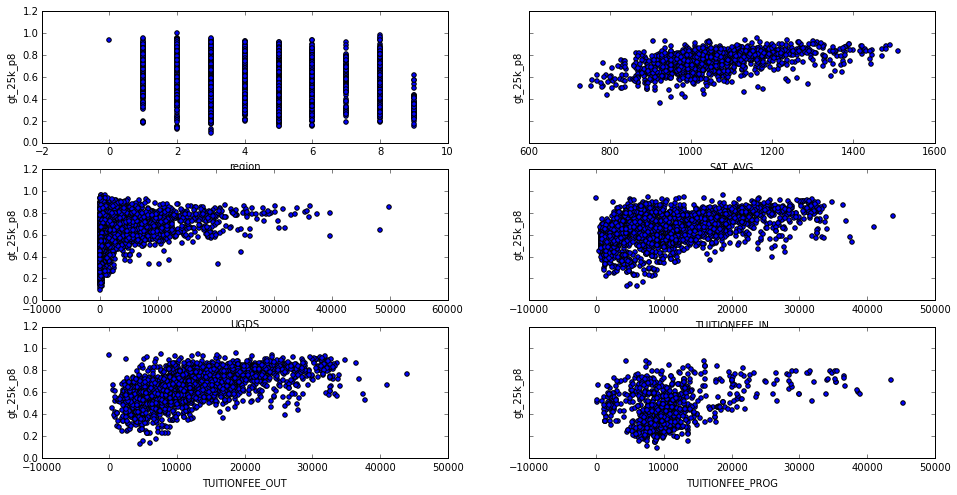

In [100]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(3, 2, sharey=True)
olddata.plot(kind='scatter', x='region', y='gt_25k_p8', ax=axs[0][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='SAT_AVG', y='gt_25k_p8', ax=axs[0][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='UGDS', y='gt_25k_p8', ax=axs[1][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='TUITIONFEE_IN', y='gt_25k_p8', ax=axs[1][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='TUITIONFEE_OUT', y='gt_25k_p8', ax=axs[2][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='TUITIONFEE_PROG', y='gt_25k_p8', ax=axs[2][1], figsize=(16, 8))

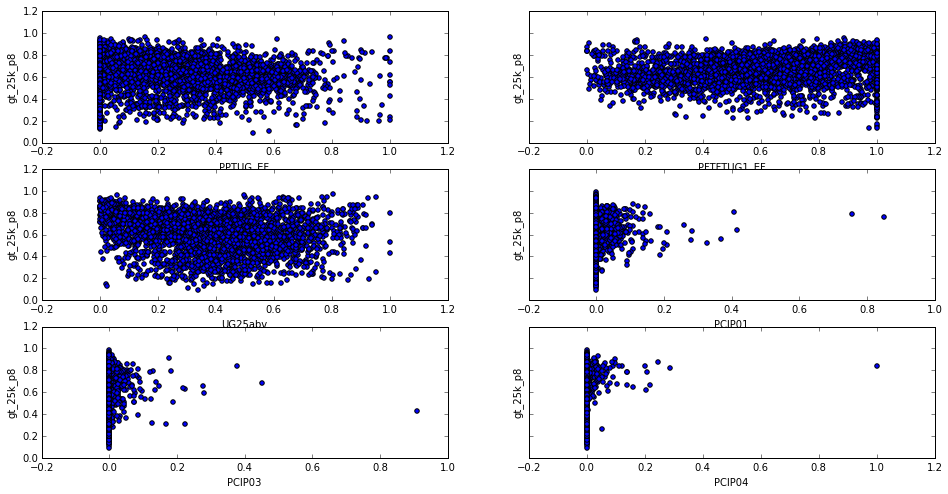

In [101]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(3, 2, sharey=True)
olddata.plot(kind='scatter', x='PPTUG_EF', y='gt_25k_p8', ax=axs[0][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PFTFTUG1_EF', y='gt_25k_p8', ax=axs[0][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='UG25abv', y='gt_25k_p8', ax=axs[1][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP01', y='gt_25k_p8', ax=axs[1][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP03', y='gt_25k_p8', ax=axs[2][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP04', y='gt_25k_p8', ax=axs[2][1], figsize=(16, 8))

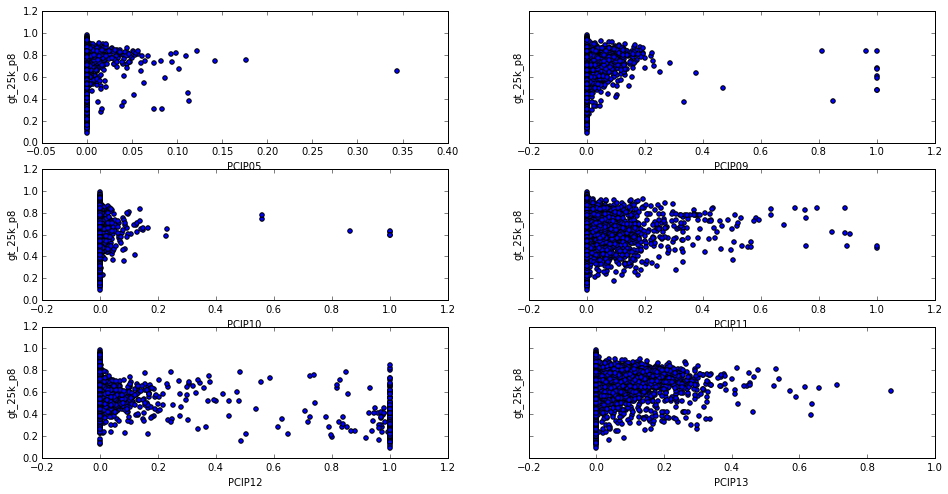

In [102]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(3, 2, sharey=True)
olddata.plot(kind='scatter', x='PCIP05', y='gt_25k_p8', ax=axs[0][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP09', y='gt_25k_p8', ax=axs[0][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP10', y='gt_25k_p8', ax=axs[1][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP11', y='gt_25k_p8', ax=axs[1][1], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP12', y='gt_25k_p8', ax=axs[2][0], figsize=(16, 8))
olddata.plot(kind='scatter', x='PCIP13', y='gt_25k_p8', ax=axs[2][1], figsize=(16, 8))

In [103]:
# Fit OLS regression model
results = ols(y=olddata['gt_25k_p8'], x=olddata[ind_vars])

In [104]:
# View the results
results


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <main> + <NUMBRANCH> + <ADM_RATE> + <PREDDEG> + <HIGHDEG>
             + <CONTROL> + <region> + <SAT_AVG> + <UGDS> + <TUITIONFEE_IN>
             + <TUITIONFEE_OUT> + <PPTUG_EF> + <PFTFTUG1_EF> + <UG25abv> + <PCIP01> + <PCIP03>
             + <PCIP04> + <PCIP05> + <PCIP09> + <PCIP10> + <PCIP11> + <PCIP12>
             + <PCIP13> + <PCIP14> + <PCIP15> + <PCIP16> + <PCIP19> + <PCIP22>
             + <PCIP23> + <PCIP24> + <PCIP25> + <PCIP26> + <PCIP27> + <PCIP29>
             + <PCIP30> + <PCIP31> + <PCIP38> + <PCIP39> + <PCIP40> + <PCIP41>
             + <PCIP42> + <PCIP43> + <PCIP44> + <PCIP45> + <PCIP46> + <PCIP47> + <PCIP48>
             + <PCIP49> + <PCIP50> + <PCIP51> + <PCIP52> + <PCIP54> + <intercept>

Number of Observations:         1406
Number of Degrees of Freedom:   53

R-squared:         0.6400
Adj R-squared:     0.6262

Rmse:              0.0545

F-stat (52, 1353):    46.2591, p-v

In [105]:
# Apply model to 2013 data.
mydata['pred_gt_25k_p8'] = results.predict()

In [111]:
# Create new datafame with just 'pred_gt_25k_p8' and 'GRAD_DEBT_MDN_SUPP'
mydata2 = mydata[mydata['GRAD_DEBT_MDN_SUPP'] != 'PrivacySuppressed']

In [118]:
# Change dtype to float
mydata2['GRAD_DEBT_MDN_SUPP'] = mydata2['GRAD_DEBT_MDN_SUPP'].astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [113]:
mydata2['pred_gt_25k_p8'].describe()

count    1260.000000
mean        0.746769
std         0.072120
min         0.483988
25%         0.708103
50%         0.751931
75%         0.791817
max         0.953856
Name: pred_gt_25k_p8, dtype: float64

In [114]:
mydata2['GRAD_DEBT_MDN_SUPP'].describe()

count     6062.000000
mean     17091.536457
std       8740.413639
min        723.500000
25%       9500.000000
50%      14589.500000
75%      24997.000000
max      47869.500000
Name: GRAD_DEBT_MDN_SUPP, dtype: float64

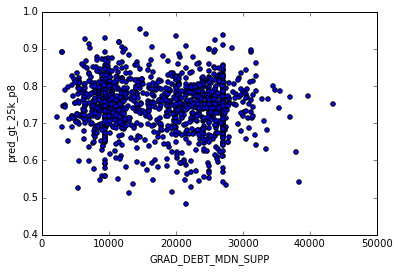

In [115]:
# Do you see a relationship? (I don't)
mydata2.plot(kind='scatter', x='GRAD_DEBT_MDN_SUPP', y='pred_gt_25k_p8')

In [119]:
# Fit OLS regression model to check.
results = ols(y=mydata2['pred_gt_25k_p8'], x=mydata2['GRAD_DEBT_MDN_SUPP'])

In [120]:
# Nope, no relationship.
results


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1139
Number of Degrees of Freedom:   2

R-squared:         0.0040
Adj R-squared:     0.0031

Rmse:              0.0712

F-stat (1, 1137):     4.5489, p-value:     0.0332

Degrees of Freedom: model 1, resid 1137

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0000     0.0000      -2.13     0.0332    -0.0000    -0.0000
     intercept     0.7566     0.0052     145.50     0.0000     0.7464     0.7668
---------------------------------End of Summary---------------------------------

## How about for Jeff's short list of schools?

In [122]:
# Apply model to Jeff's data.
jeffdata['pred_gt_25k_p8'] = results.predict()
#Create new datafame with just 'pred_gt_25k_p8' and 'GRAD_DEBT_MDN_SUPP'
jeffdata2 = jeffdata[jeffdata['GRAD_DEBT_MDN_SUPP'] != 'PrivacySuppressed']
# Change dtype to float
jeffdata2['GRAD_DEBT_MDN_SUPP'] = jeffdata2['GRAD_DEBT_MDN_SUPP'].astype(float)

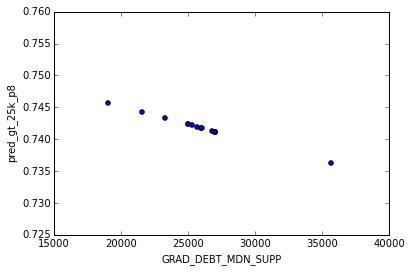

In [129]:
# Do you see a relationship? (Interesting....)
jeffdata2.plot(kind='scatter', x='GRAD_DEBT_MDN_SUPP', y='pred_gt_25k_p8')